# Practice (K-means Clustering)

### Kmeans

In [2]:
## Import and define some variables
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_dimensions = 2
k = 3
colors = ['red', 'green', 'blue', 'cyan', 'brown'][:k] # Coloring: The 1st cluster is red, the 2nd is green, ...
color_mapping = {i:x for i, x in enumerate(colors)} # Mapping: 0 becomes red, 1 becomes green...
color_mapping

{0: 'red', 1: 'green', 2: 'blue'}

<Axes: xlabel='0', ylabel='1'>

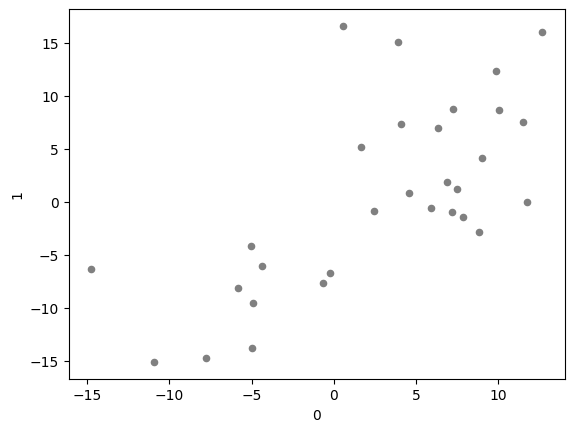

In [4]:
# Generate fake data
data = pd.DataFrame(make_blobs(n_samples=30, n_features=n_dimensions, centers=k, random_state=8, cluster_std=3)[0])
data.plot.scatter(0, 1, color='gray')

<Axes: xlabel='0', ylabel='1'>

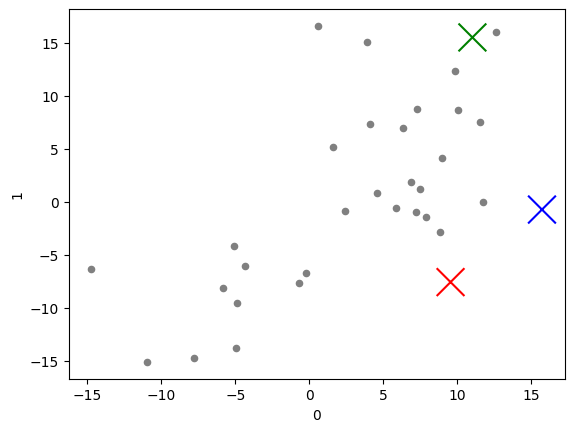

In [5]:
# Algorithm: Create k points for starting centroids
r = np.random.RandomState(13) # Create a numpy random object with defined random state
centroid = pd.DataFrame(r.uniform(low=data.min().min(), high=data.max().max(), size=(k,2)))
ax = data.plot.scatter(0, 1, color='gray')
centroid.plot.scatter(0, 1, marker='x', ax=ax, color=colors, s=400)

In [7]:
# Assign each point to the closest centroid
assignments = pd.DataFrame(euclidean_distances(data, centroid)).idxmin(axis=1)
assignments



0     0
1     0
2     0
3     0
4     1
5     1
6     2
7     2
8     0
9     0
10    1
11    2
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    2
22    0
23    1
24    0
25    1
26    0
27    1
28    1
29    1
dtype: int64

<Axes: xlabel='0', ylabel='1'>

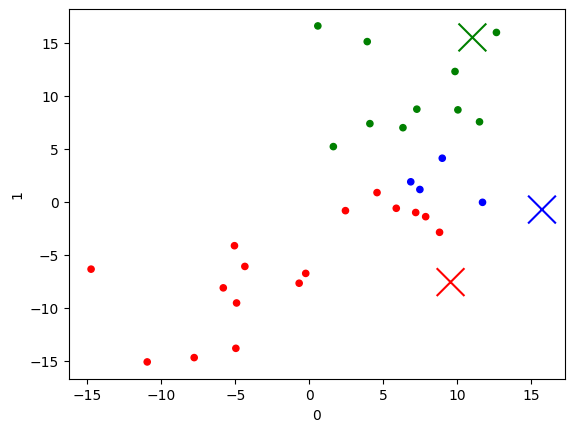

In [8]:
# Plot with colors
ax = data.plot.scatter(0, 1, color=assignments.map(color_mapping))
centroid.plot.scatter(0, 1, marker='x', ax=ax, color=colors, s=400)

In [9]:
# Update centroid
centroid = data.groupby(assignments).mean()


<Axes: xlabel='0', ylabel='1'>

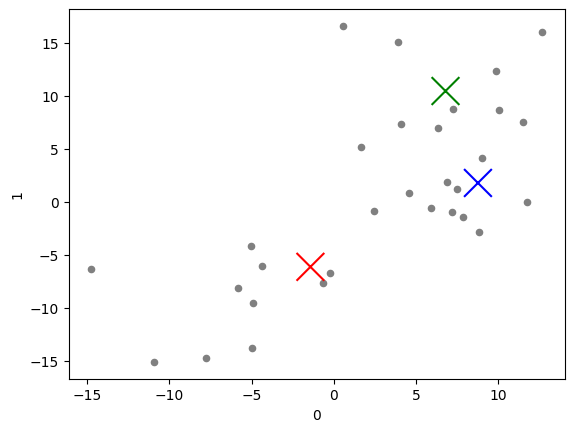

In [10]:
ax = data.plot.scatter(0, 1, color='gray')
centroid.plot.scatter(0, 1, marker='x', ax=ax, color=colors, s=400)

<Axes: xlabel='0', ylabel='1'>

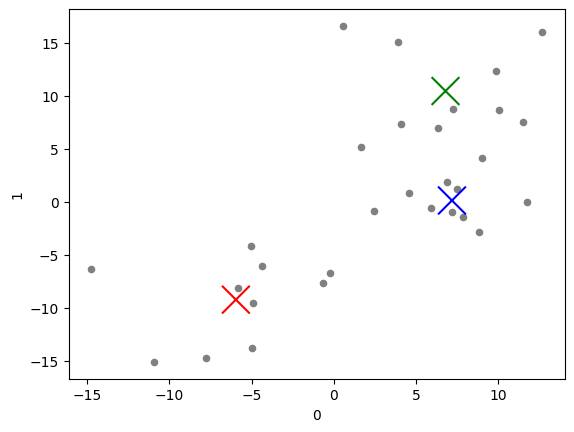

In [13]:
# Let's put all steps togehter to make k-means algorithm

while True:
    # Assign each point to the closest centroid
    old_assignments = assignments
    assignments = pd.DataFrame(euclidean_distances(data, centroid)).idxmin(axis=1)
    # Update centroid
    centroid = data.groupby(assignments).mean()
    if old_assignments.equals(assignments):
        break

ax = data.plot.scatter(0, 1, color='gray')
centroid.plot.scatter(0, 1, marker='x', ax=ax, color=colors, s=400)

# Choosing k

### Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia (WSS)')

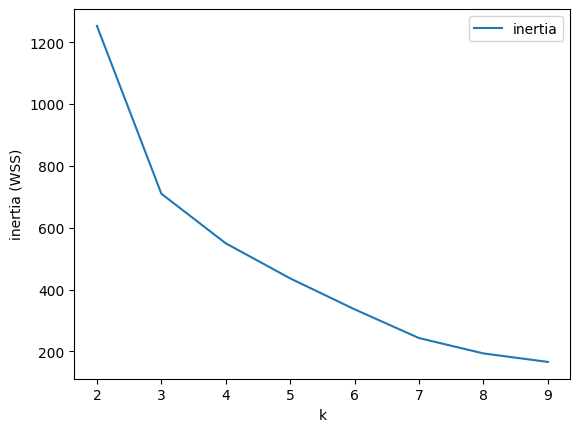

In [14]:
# Plot the elbow
inertia_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(data)
    cluster_id = pd.Series(model.predict(data))
    inertia_list.append({'k':k, 'inertia':model.inertia_})

ax = pd.DataFrame(inertia_list).set_index('k').plot.line()
ax.set_ylabel('inertia (WSS)')

In [15]:
# Calculating the inertia "by hand"
from sklearn.metrics.pairwise import paired_distances

model = KMeans(n_clusters=4)
model.fit(data)
cluster_id = pd.Series(model.predict(data))
centroid = data.groupby(cluster_id).mean()
distance_to_centroid = paired_distances(data, centroid.loc[cluster_id])

print ((distance_to_centroid**2).sum())

model.inertia_

572.7225050129257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


572.7225050129258

In [ ]:
distance_to_centroid

array([8.00950699, 3.28462758, 2.89468067, 2.93703517, 5.33992826,
       4.90431881, 1.31358794, 0.98527616, 4.46375141, 2.85783032,
       8.77158812, 5.0744114 , 2.8662167 , 1.27733796, 4.83544167,
       1.4376273 , 1.67819296, 6.84613376, 2.53594648, 2.79152878,
       4.06778263, 4.21782164, 2.31965401, 5.41937718, 3.29987988,
       2.29609176, 2.1151002 , 3.57502199, 4.1721173 , 7.24122998])

### Silhouette method

Text(0, 0.5, 'Silhouette Score')

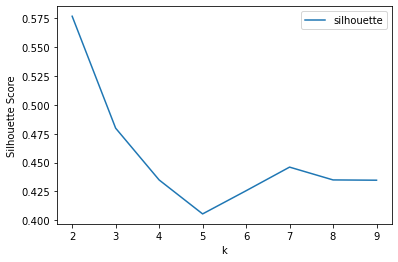

In [ ]:
# Plot the silhouette

silhouette_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(data)
    cluster_id = pd.Series(model.predict(data))

    # The two following lines are equivalent
    silhouette = silhouette_score(data, cluster_id)
    #silhouette = silhouette_samples(data, cluster_id).mean()

    silhouette_list.append({'k':k, 'silhouette':silhouette})


ax = pd.DataFrame(silhouette_list).set_index('k').plot.line()
ax.set_ylabel('Silhouette Score')

### Silhouette Score

In [ ]:
# Let's calculate by hand the silhouette score of the first observation
model = KMeans(n_clusters=4)
model.fit(data)
cluster_id = pd.Series(model.predict(data))

dm = pd.DataFrame(euclidean_distances(data))

# Calculate mean distance of the observation 0 to the clusters
distance_to_cluster = dm.iloc[0].drop(0).groupby(cluster_id).mean()

intra_cluster_distance = distance_to_cluster[cluster_id[0]]
nearest_cluster_distance = distance_to_cluster.drop(cluster_id[0]).min()
silhouette_by_hand = (nearest_cluster_distance-intra_cluster_distance)/max(nearest_cluster_distance,intra_cluster_distance)

# Same silhouette...
print (silhouette_by_hand, silhouette_samples(data, cluster_id)[0])
dm.iloc[0:6,0:6].round(1).to_dict()

0.043452770725335634 0.043452770725335634


{0: {0: 0.0, 1: 14.5, 2: 14.1, 3: 9.5, 4: 28.5, 5: 23.3},
 1: {0: 14.5, 1: 0.0, 2: 1.0, 3: 13.6, 4: 22.3, 5: 14.8},
 2: {0: 14.1, 1: 1.0, 2: 0.0, 3: 12.7, 4: 23.3, 5: 15.8},
 3: {0: 9.5, 1: 13.6, 2: 12.7, 3: 0.0, 4: 33.7, 5: 27.1},
 4: {0: 28.5, 1: 22.3, 2: 23.3, 3: 33.7, 4: 0.0, 5: 7.7},
 5: {0: 23.3, 1: 14.8, 2: 15.8, 3: 27.1, 4: 7.7, 5: 0.0}}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


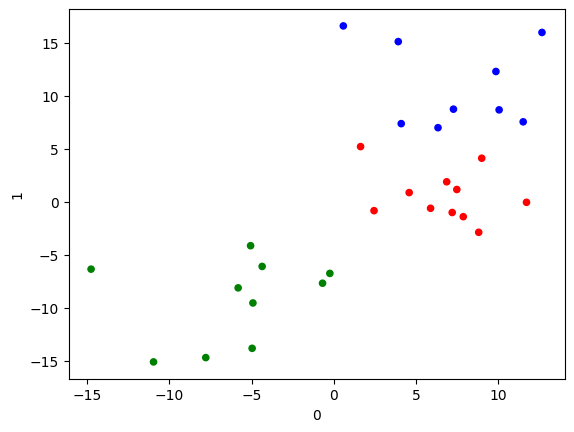

In [18]:
# k=3 based on elbow method
model = KMeans(n_clusters=3)
model.fit(data)
assignments = pd.Series(model.predict(data))
ax = data.plot.scatter(0, 1, color=assignments.map(color_mapping))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


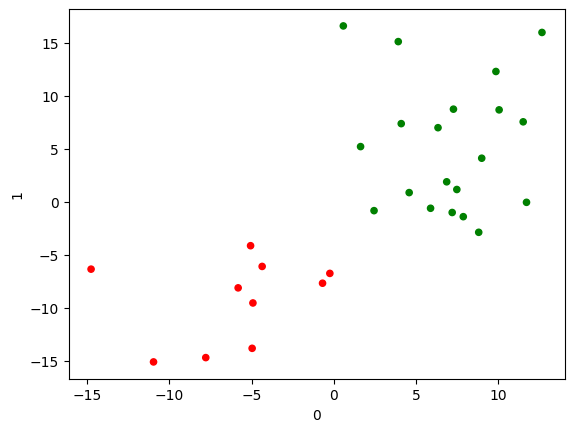

In [19]:
# k=2 based on silhouette method
model = KMeans(n_clusters=2)
model.fit(data)
assignments = pd.Series(model.predict(data))
ax = data.plot.scatter(0, 1, color=assignments.map(color_mapping))